# Define a simple Neural Network with Double Deep Q Network (DDQN)

In this tutorial we show how to use our interface for defining the neural network architecture without knowing Tensor FLow or Keras. In this case, we use the Double Deep Q Network (DDQN) agent from CAPOIRL library to address again the Cart Pole problem.

In [6]:
from RL_Problem import rl_problem
from RL_Agent import ddqn_agent
from RL_Problem.base.ValueBased import dqn_problem
from RL_Agent.base.utils import agent_saver, history_utils
from RL_Agent.base.utils.networks import networks

import gym

In the next cell, we defined the environment. We use the CartPole environment the Gym library from OpenAI, this is a discrete environment were the posibles actions are: 1) move the cart to the left, move the cart to the rigth. The forces needed to move the cart are automaticatly calculated by the environment. The reward function provides a value of +1 every time step the car is upritgh. An episode ends when the pole is too far from the vertical, go outside of the screem or after 500 timesteps.

Our library is compatible with all Gym environments and use a compatible interfaz based in Gym's one, for defining your own envirinments. 

In [3]:
environment = "CartPole-v1"
environment = gym.make(environment)

CAPOIRL have a very simple interfaz to define neural networks based in dictionaries. This is oriented to people with low experience with neural network, those which have never used the deep learning libraries or modules compatibles with CAPOIRL (Tensor Flow and Keras) and for fast prototyping.

In [4]:
net_architecture =  {"dense_lay": 2,
                    "n_neurons": [128, 128],
                    "dense_activation": ['relu', 'tanh']
                    }


We provide some functions to define the dictionaries without the necessity or remember all the keys. This funcionality can be imported as "from RL_Agent.base.utils.networks import networks" and it is a compilation of functions to create dictionies compatibles with each kind of RL agent.

The next cell redefines "net_architecture" using the DDQN function.

In [7]:
net_architecture = networks.double_dqn_net(dense_layers=2,
                                           n_neurons=[128, 128],
                                           dense_activation=['relu', 'tanh'])

Here we define the RL agent that we are going to use. In this case, we selected a DDQN agent which is an improvement over DQN.

The agent is defined configuring a few parameters:

* learning_rate: learning rate for training the neural network.
* batch_size: Size of the batches used for training the neural network. 
* epsilon: Determines the amount of exploration (float between [0, 1]). 0 -> Full Exploitation; 1 -> Full exploration.
* epsilon_decay: Decay factor of the epsilon. In each iteration we calculate the new epslon value as: epsilon' = epsilon * epsilon_decay.
* esilon_min: minimun value epsilon can reach during the training procedure.
* n_stack: number of stacked timesteps to form the state
* net_architecture: net architecture defined before.

Here we notice two new parameters:

"net_architecture" is used to set the network architecture that we have defined before. In this example is a dictionarie but in latter tutorials we will see how we can define more complex networks using keras or tensorflow.

"n_ stack" is a parameter used to incorporate temporal information into the states. By default n_stack = 1, this means that the state will be formed only by the current state out of the environment. Where n_stack = n, being n > 1, the state will be formed by the n last states stacked. This means, the current state out of the environment, the state in timestep -1, in timestep -2 , ..., to timestep - (n-1). If n=5 the state will be formed by the 5 last states and will have saphe (5, state_size).

In [8]:
agent = ddqn_agent.Agent(learning_rate=1e-3,
                         batch_size=128,
                         epsilon=0.4,
                         epsilon_decay=0.999,
                         epsilon_min=0.15,
                         n_stack=5,
                         net_architecture=net_architecture)

Creating a RL problem were the comunications between agent and environment are managed.

In [9]:
problem = dqn_problem.DQNProblem(environment, agent)

Next step is solving the RL problem that we have define. Here we specify the number of episodes, the render boolean, the verbosity of the function and finally the skip_states parameter. 

The skip_states parameters have value 1 by default, this means that the agent will select an ation every timestep to be executed in the environment. When skip_states = n being n > 1, an action selected by the agent will be executed n timesteps and then the actor will select another action. This allows a faster collection of experiences during training procedure avoiding execute the neural network each timestep. 

This state skipping technique is introduced by Mnih, V., Kavukcuoglu, K., Silver, D. et al. Human-level control through deep reinforcement learning. Nature 518, 529–533 (2015).
            https://doi.org/10.1038/nature14236If.

In [10]:
problem.solve(episodes=100, render=True, skip_states=3)

Episode:  1 Epochs:  10  Reward: 10.0 Smooth Reward: 10.0  Epsilon: 0.4000
Episode:  2 Epochs:  32  Reward: 32.0 Smooth Reward: 21.0  Epsilon: 0.4000
Episode:  3 Epochs:  18  Reward: 18.0 Smooth Reward: 20.0  Epsilon: 0.4000
Episode:  4 Epochs:  10  Reward: 10.0 Smooth Reward: 17.5  Epsilon: 0.4000
Episode:  5 Epochs:  37  Reward: 37.0 Smooth Reward: 21.4  Epsilon: 0.4000
Episode:  6 Epochs:  10  Reward: 10.0 Smooth Reward: 19.5  Epsilon: 0.4000
Episode:  7 Epochs:  12  Reward: 12.0 Smooth Reward: 18.4  Epsilon: 0.4000
Episode:  8 Epochs:  17  Reward: 17.0 Smooth Reward: 18.2  Epsilon: 0.4000
Episode:  9 Epochs:  14  Reward: 14.0 Smooth Reward: 17.8  Epsilon: 0.4000
Episode:  10 Epochs:  10  Reward: 10.0 Smooth Reward: 17.0  Epsilon: 0.4000
Episode:  11 Epochs:  9  Reward: 9.0 Smooth Reward: 16.9  Epsilon: 0.4000
Episode:  12 Epochs:  9  Reward: 9.0 Smooth Reward: 14.6  Epsilon: 0.4000
Episode:  13 Epochs:  20  Reward: 20.0 Smooth Reward: 14.8  Epsilon: 0.4000
Episode:  14 Epochs:  32 

The next cell run n iterations in fully explorative mode to check the performance obtained by the agent. It will be rendered by default.

In [11]:
problem.test(n_iter=10)

Test episode:  1 Epochs:  500  Reward: 500.0 Smooth Reward: 500.0  Epsilon: 0.1499
Test episode:  2 Epochs:  363  Reward: 363.0 Smooth Reward: 431.5  Epsilon: 0.1499
Test episode:  3 Epochs:  500  Reward: 500.0 Smooth Reward: 454.3  Epsilon: 0.1499
Test episode:  4 Epochs:  500  Reward: 500.0 Smooth Reward: 465.8  Epsilon: 0.1499
Test episode:  5 Epochs:  500  Reward: 500.0 Smooth Reward: 472.6  Epsilon: 0.1499
Test episode:  6 Epochs:  464  Reward: 464.0 Smooth Reward: 471.2  Epsilon: 0.1499
Test episode:  7 Epochs:  500  Reward: 500.0 Smooth Reward: 475.3  Epsilon: 0.1499
Test episode:  8 Epochs:  500  Reward: 500.0 Smooth Reward: 478.4  Epsilon: 0.1499
Test episode:  9 Epochs:  500  Reward: 500.0 Smooth Reward: 480.8  Epsilon: 0.1499
Test episode:  10 Epochs:  500  Reward: 500.0 Smooth Reward: 482.7  Epsilon: 0.1499


Here we show the history of rewards obtained during the epochs of the training process. Param n_moving_average select how much time states will be use to calculate a smothed versión of the data (blue line)

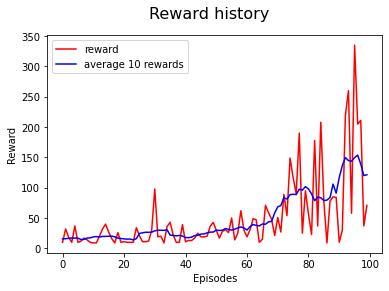

In [12]:
hist = problem.get_histogram_metrics()
history_utils.plot_reward_hist(hist, 10)

Run this last cell if you want to save the agent to a file.

In [ ]:
agent_saver.save(agent, 'agent_ddqn_pole.json')